# Central Limit Theorem

We will show with an example the central limit theorem

### Generate random number according to a uniform distriobution

We generate random numbers according to a uniform distribution between [-1,1] and we compute their average. 
We look at the distibution of ther average

In [1]:
int ngen; 
int nexp;
TH1 * h1; 
TRandom * r = new TRandom3(); 

In [2]:
//%jsroot on

In [3]:
ngen = 100;
nexp = 100; 

In [4]:
h1 = new TH1D("h1","Distribution of generated values",100,-1,1);
for (int i = 0; i < 10000; ++i) {
    double x = r->Uniform(-1,1);
    h1->Fill(x);        
}

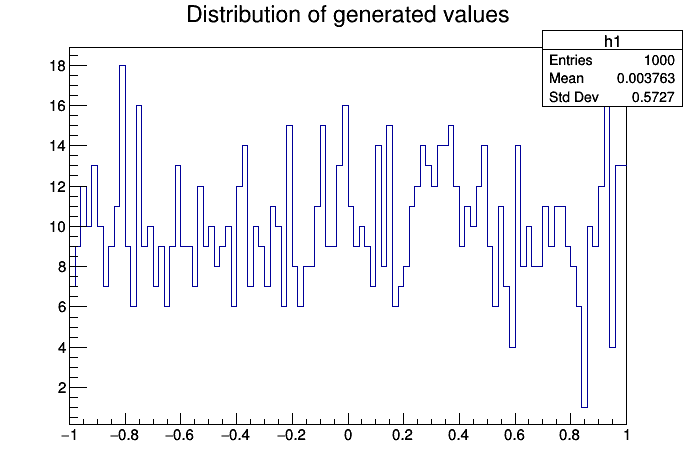

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [5]:
h1->Draw();
gPad->Draw();

### Study the distribution of the average of the generated random numbers

We look at the obtained average distribution. By the law of the large number will converge to a finite value. 
In order to have the variance of the avergae values obtained indipendent of N (number of generated events), we will 
in reality look at the distribution of $\sqrt{n}  \times \mu$

In [6]:
auto generate_values = [](int n){
    double sum = 0; 
    for (int i = 0; i < n; ++i) {
        double x = r->Uniform(-sqrt(3),sqrt(3));
        sum += x;         
    }
    double mean = sum/sqrt(n);
    return mean; 
};

In [7]:
hout = new TH1D("h","Distribution of average values",50,-3,3);

In [20]:
hout->Reset();
for (int i = 0; i < 10000; ++i){ 
    double average = generate_values(10);
    hout->Fill(average);
}

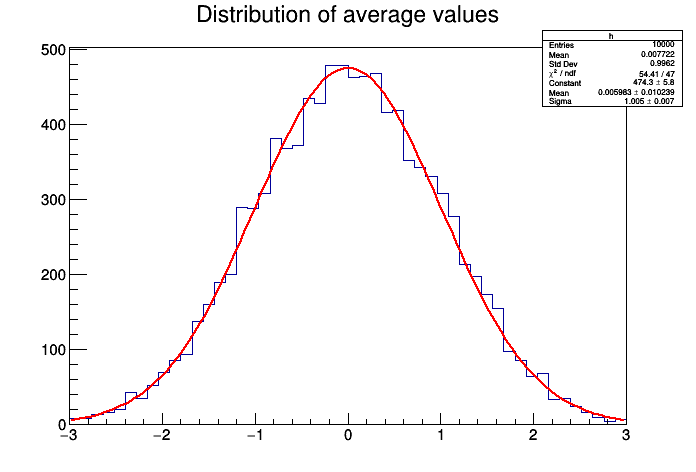

 FCN=54.4119 FROM MIGRAD    STATUS=CONVERGED      51 CALLS          52 TOTAL
                     EDM=6.99076e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Par_0        4.74288e+02   5.83796e+00   1.73016e-02  -2.70383e-05
   2  Par_1        5.98266e-03   1.02389e-02   3.71889e-05   1.14787e-01
   3  Par_2        1.00520e+00   7.36842e-03   7.27229e-06   4.50285e-03


In [21]:
hout->Fit("gaus");
gStyle->SetOptFit(111);
gPad->Draw();    